#**Project Name** : **Advertising & Sales**

### **Data Fields** :



1. TV : Amount spend on TV ads on sales in dollars.
2. Radio : Amount spend on radio ads on sales in dollars.
3. Newspaper : Amount spend on newspaper ads on sales in dollars.
4. Sales : Sale in dollars.







### **Project Summary -**

The Advertising Sales Prediction project focuses on analyzing, visualizing and predicting sales. By examining various advertising channels like TV, Radio, Newspaper the sales is predicted.

### **Project Objectives:**

*   Analyze sales data to identify trends, patterns, and seasonality.
*   Explore sales performance across different channels.
*   Identifying the correlation between the independent and dependent variables
*   Visualize sales data using charts and graphs for better understanding.
*   Spliting the dataset in train and test model.
*   Predicting the sales with different-different linear regression models and check which model fits the best for the prediction with max efficency.


### **Project Steps:**

* **Data Collection:** Gather data from different means of channels.

* **Data Cleaning:** Clean and preprocess the data by handling missing values, duplicates, and inconsistencies. Convert data types as needed for analysis.

* **Exploratory Data Analysis (EDA):** Perform exploratory analysis to understand the distribution of sales, identify outliers, and explore relationships between independent and dependent variables.

* **Spliting the data in Train/Test Model:** Analyze customer purchasing behavior, such as repeat purchases, average transaction values, and customer demographics.

* **Applying Various Linear Regression Models:** Testing the different LR models on train dataset in order to find most efficent model.

* **Calculating the r2_score :** Calculate the r2_score which ultimately calculate the coefficient of determination for regression models, to measures the goodness of fit of the model to the dataset.



In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

In [10]:
# Importing Data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/Data/Advertising.csv")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df.head(10)


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [12]:
# An unexpected column is appearding in the data, so dropping the column from the dataset
df.drop("Unnamed: 0", inplace=True, axis = 1)

In [13]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## **Analyzing the Data**

In [15]:
df.shape


(200, 4)

In [19]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


**Seems like there is no null values in data so now start with visualizing the data.**

### **Visualize the Data**

To undertand the variables correclation with the each other

<Axes: xlabel='newspaper', ylabel='sales'>

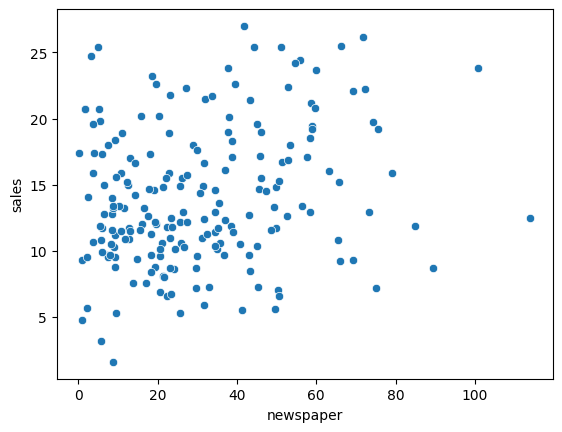

In [26]:
sns.scatterplot(data = df, x='newspaper', y = 'sales')


<Axes: xlabel='TV', ylabel='sales'>

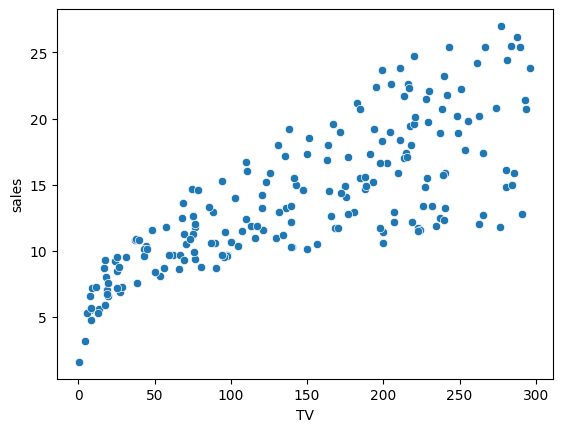

In [27]:
sns.scatterplot(data = df, x='TV', y = 'sales')


<Axes: xlabel='radio', ylabel='sales'>

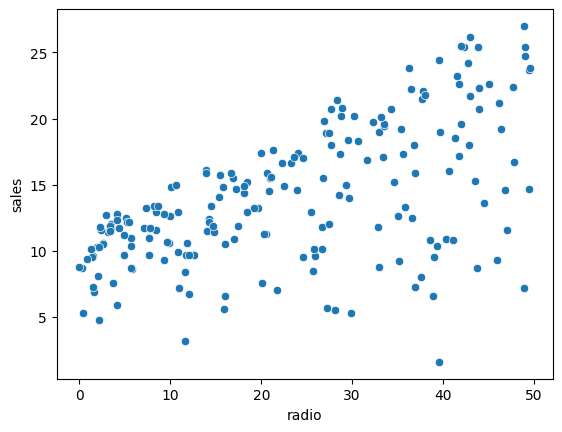

In [28]:
sns.scatterplot(data = df, x='radio', y = 'sales')


In [36]:
# Checking the correlation

data_correlation = df.corr()
data_correlation

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

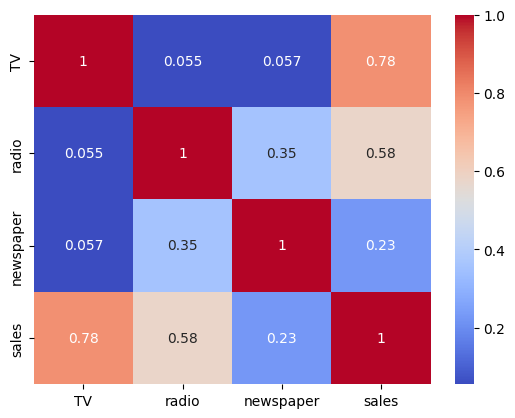

In [37]:
sns.heatmap(data_correlation, annot=True, cmap='coolwarm')

**As per the above visualization it is clear that no independent variables are highly correlated to each other. So taking the first 3 columns (TV, Newspaper, Radio) as a feature and Sales as a label.**

## **Building Different Liner Regression Models**

### **Liner Regression Function**

In [70]:
def Linear_regression(x_train, y_train):
  print("Linear Regression : ")
  linear_regression = LinearRegression()
  linear_regression.fit(x_train, y_train)
  return linear_regression

### **Ridge Regression Function**

In [67]:
def Ridge_regression(x_train, y_train):
  print("Ridge Regression : ")
  ridge_regression = Ridge(alpha=0.9)
  ridge_regression.fit(x_train, y_train)
  return ridge_regression


### **Lasso Regression Function**

In [71]:
def Lasso_regression(x_train, y_train):
  print("Lasso Regression : ")
  lasso_regression = Lasso(alpha=0.8, max_iter=10000)
  lasso_regression.fit(x_train, y_train)
  return lasso_regression


### **Sochastic Gradient Descent Function**

In [47]:
def SGD_Regressor(x_train, y_train):
  print("SGD Regression : ")
  SGD_regression = SGDRegressor(max_iter=10000)
  SGD_regression.fit(x_train, y_train)
  return SGD_regression


## **Build and Train Model Function**

In [63]:
def build_train_model(data, target_values,reg_func):
  X = data.drop(target_values, axis=1)
  Y = df[target_values]
  x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, test_size=0.2)

  scaler = StandardScaler()
  scaler.fit(x_train)

  x_train = scaler.transform(x_train)

  x_test = scaler.transform(x_test)

  model = reg_func(x_train, y_train)
  score = model.score(x_train, y_train)
  print("Training Score : ", score)

  y_pred = model.predict(x_test)
  r2score = r2_score(y_test, y_pred)
  print("Testing Score : ", r2score)

  df_y = pd.DataFrame({'y_test':y_test, 'y_pred': y_pred})
  df_y.sample(10)
  plt.figure(figsize=(10,8))

  plt.plot(y_pred, label = 'Predicted')
  plt.plot(y_test.values, label = 'Actual')
  plt.ylabel('Median Value')
  plt.legend()
  plt.show()

  return{'model' : model,
            'x_train' : x_train, 'x_test' : x_test,
            'y_train' : y_train, 'y_test' : y_test,
            'y_pred' : y_pred, 'sample' : df_y.sample(10)
            }






### **Liner Regression Fit Model**

Linear Regression : 
Training Score :  0.8951853227932696
Testing Score :  0.9020571312766219


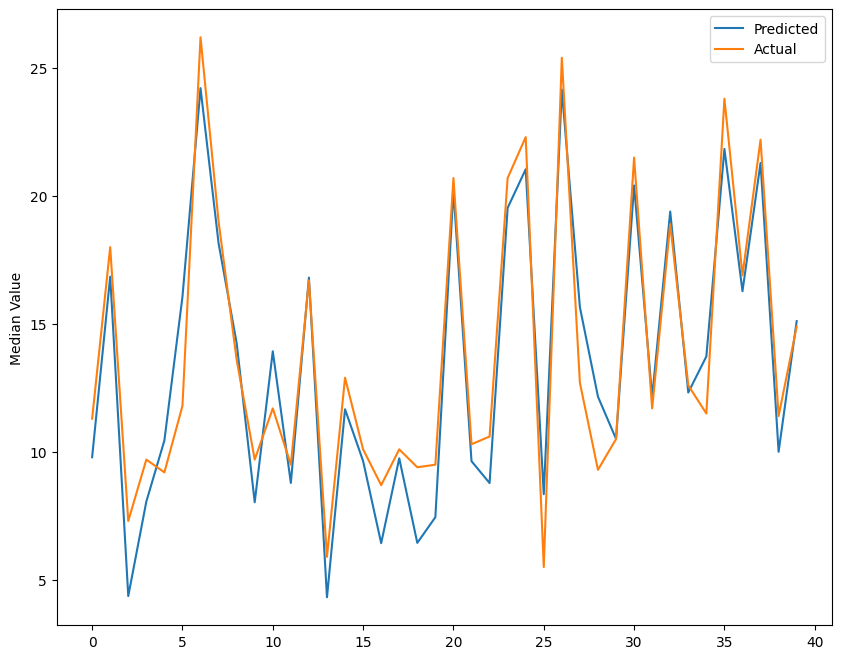

In [76]:
Linear_Regression = build_train_model(df,'sales', Linear_regression)

### **Ridge Regression Fit Model**

Ridge Regression : 
Training Score :  0.9073178907655746
Testing Score :  0.8545152391127503


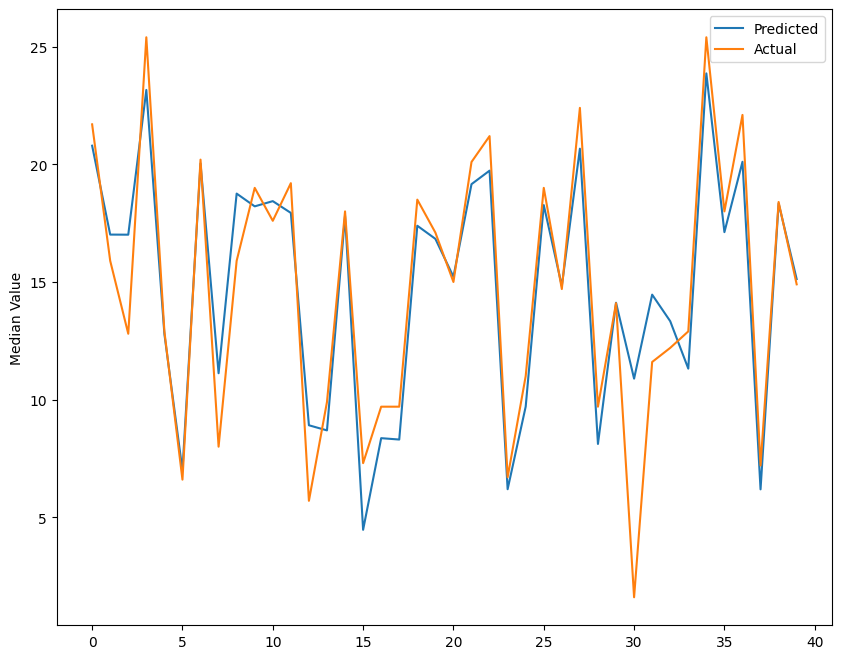

In [77]:
Ridge_Regression = build_train_model(df,'sales', Ridge_regression)

### **Lasso Regression Fit Model**

Lasso Regression : 
Training Score :  0.8517233282763153
Testing Score :  0.8471822827978202


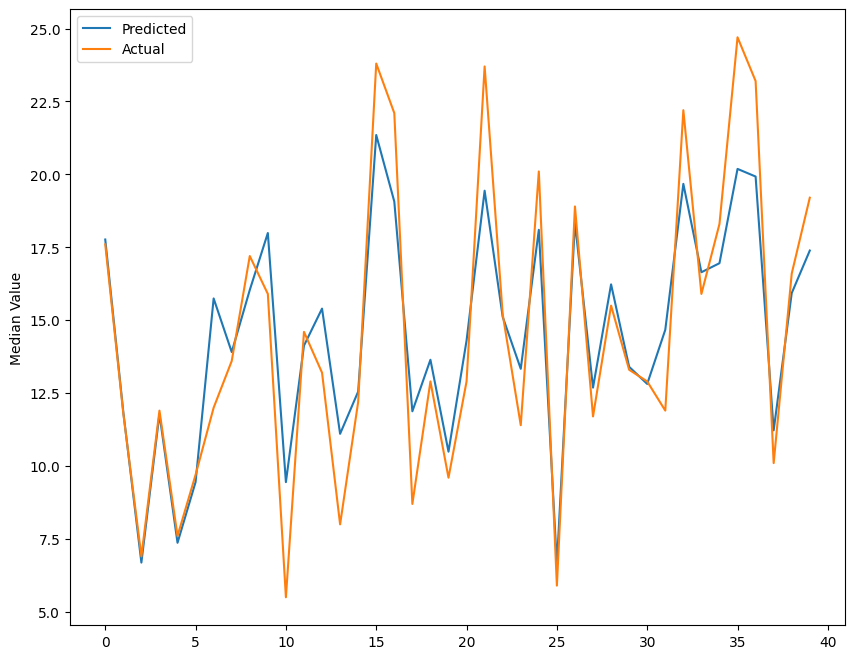

In [81]:
Lasso_Regression = build_train_model(df,'sales', Lasso_regression)

### **Sochastic Gradient Descent Fit Model**

SGD Regression : 
Training Score :  0.8900712231596007
Testing Score :  0.9168634861416485


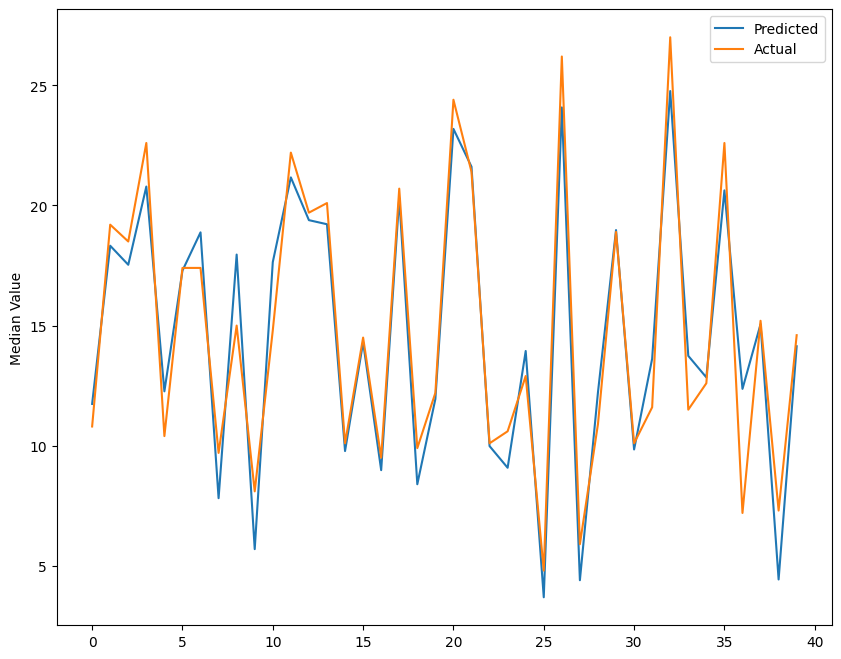

In [82]:
SGD_Regression = build_train_model(df,'sales', SGD_Regressor)

**Four regression models were successfully applied to the dataset to calculate R-squared values. Among these models, the Linear Regression model achieved the highest R-squared value on the testing data (0.9021), indicating slightly better performance in explaining the variance in the testing data compared to the other models. However, it's important to consider additional factors such as cross-validation and trade-offs when determining the best model. The choice should be based on specific goals and requirements, as well as an assessment of each model's behavior on unseen data, in order to make a more informed decision.**